Analiza de regresie liniară este utilizată pentru a crea un model care descrie relația dintre o variabilă dependentă și una sau mai multe variabile independente. În funcție de existența uneia sau mai multor variabile independente, se face o distincție între analiza de regresie liniară simplă și analiza de regresie liniară multiplă.

În cazul unei regresii liniare simple, obiectivul este de a examina influența unei variabile independente asupra unei variabile dependente. În al doilea caz, o regresie liniară multiplă, se analizează influența mai multor variabile independente asupra unei variabile dependente.

Example: Simple Linear Regression
    Does the height have an influence on the weight of a person?

Example: Multiple Linear Regression
Do the height and gender have have an influence on the weight of a person?

Selectarea setului de date

Importarea bibliotecilor si setului de date.
Studierea setului de date.

Setarea problemei si Pregatirea setului de date pentru antrenare.

Divizare in set de date pentru antrenare si set de date pentru testare.

Initializarea modelului de regresie liniara si aplicarea acestuia pe datele noastre.

Concluzii.

Setul de date il veti alege de sine stator din urmatoarele repositorii (important este ca setul de date sa fie compatibil cu rezolvarea problemei de regresie liniara):
a. https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=&sort=taskDown&view=table
b. https://www.kaggle.com/rtatman/datasets-for-regression-analysis
c. https://data.world/datasets/regression
d. https://www.kdnuggets.com/datasets/index.html

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#import dataset (nu are header asa ca au fost adaugate ulterior)
csv = pd.read_csv("imbd_superhero.csv", 
                  header=None, 
                  names=['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnknownColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare'])

<Axes: >

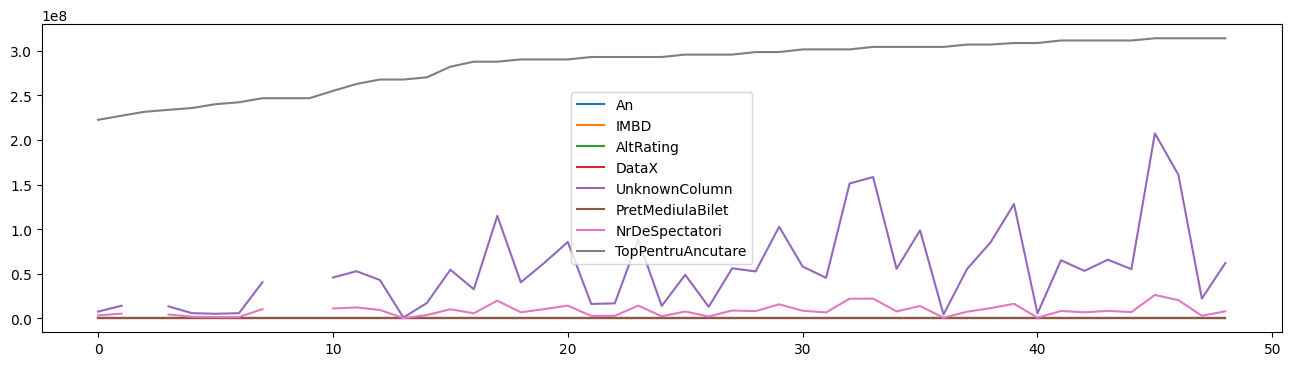

In [15]:
csv.plot(figsize=(16, 4)) 

In [16]:
csv.isnull().values.any()

np.True_

In [17]:
csv.head()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnknownColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902


<Axes: >

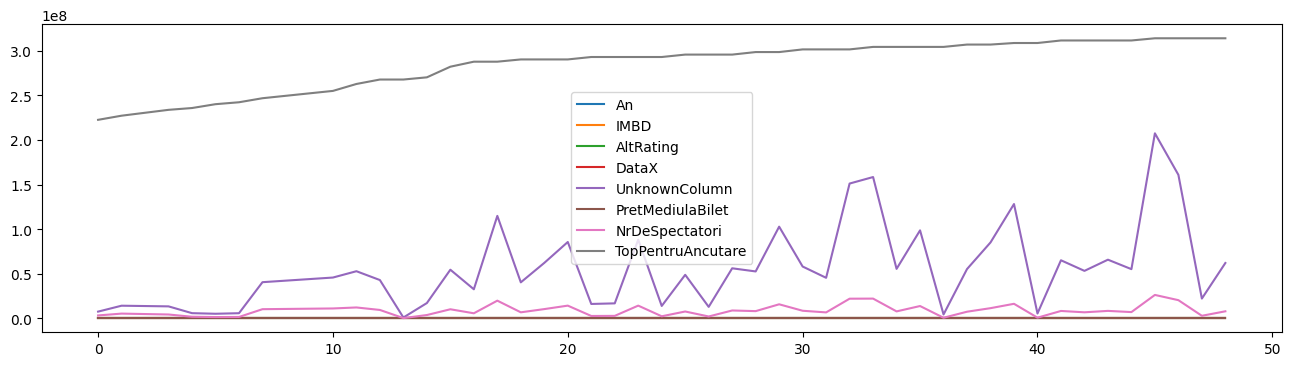

In [18]:
## data fara randuri cu erori
data_fara_lipse = csv.dropna()
data_fara_lipse.tail()
data_fara_lipse.plot(figsize=(16, 4)) 

array([[<Axes: title={'center': 'An'}>, <Axes: title={'center': 'IMBD'}>,
        <Axes: title={'center': 'AltRating'}>],
       [<Axes: title={'center': 'DataX'}>,
        <Axes: title={'center': 'UnknownColumn'}>,
        <Axes: title={'center': 'PretMediulaBilet'}>],
       [<Axes: title={'center': 'NrDeSpectatori'}>,
        <Axes: title={'center': 'TopPentruAncutare'}>, <Axes: >]],
      dtype=object)

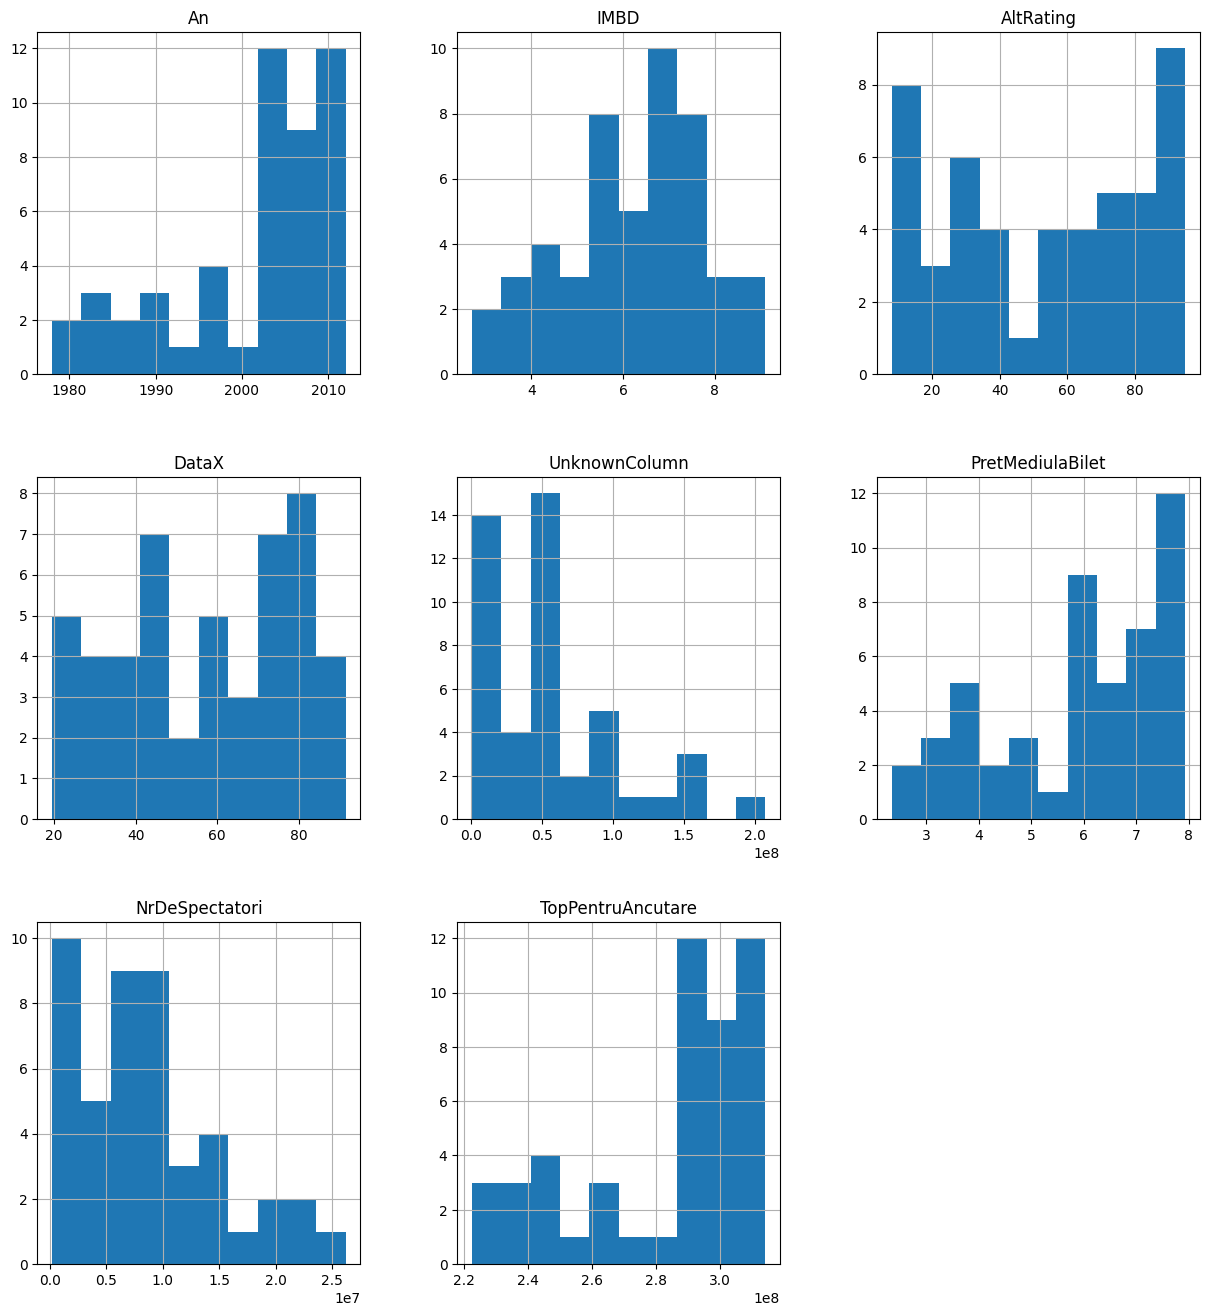

In [19]:
csv.hist(figsize = (15,16))

In [20]:
dc = data_fara_lipse[data_fara_lipse['Organizatia'] == 'DC']
XY = dc[['An', 'PretMediulaBilet']]
# caracteristica an - variabila independenta x
X = dc['An']
# raspunsul Pretul mediu la bilet - variabila dependenda y
Y = dc['PretMediulaBilet']



<Axes: xlabel='An', ylabel='PretMediulaBilet'>

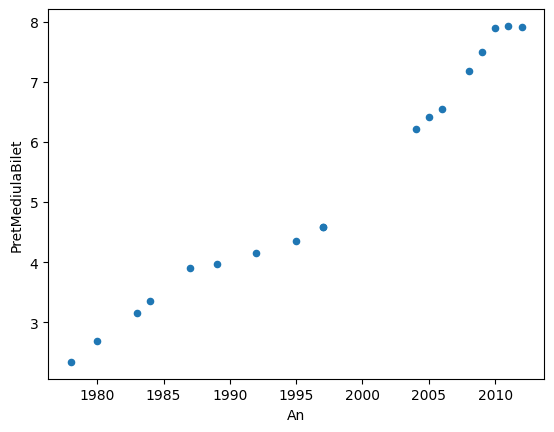

In [21]:
XY.plot.scatter(y = 'PretMediulaBilet', x = 'An')

In [22]:
XY.corr()
# XY.descibe()

,An,PretMediulaBilet
An,1.000000,0.982542
PretMediulaBilet,0.982542,1.000000


In [23]:
model = LinearRegression()

In [24]:

X = dc[['An']].values
Y = dc[['PretMediulaBilet']].values
print(X,Y)

[[1978]
 [1980]
 [1983]
 [1984]
 [1987]
 [1989]
 [1992]
 [1995]
 [1997]
 [1997]
 [2004]
 [2005]
 [2006]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]] [[2.34]
 [2.69]
 [3.15]
 [3.36]
 [3.91]
 [3.97]
 [4.15]
 [4.35]
 [4.59]
 [4.59]
 [6.21]
 [6.41]
 [6.55]
 [7.18]
 [7.5 ]
 [7.89]
 [7.93]
 [7.92]]


In [27]:
pretMediuBilet_model = model.fit(X,Y)
yp=pretMediuBilet_model.predict(np.array([[1994],[2028]]))
print(yp)

[[ 4.75756185]
 [10.35451003]]


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


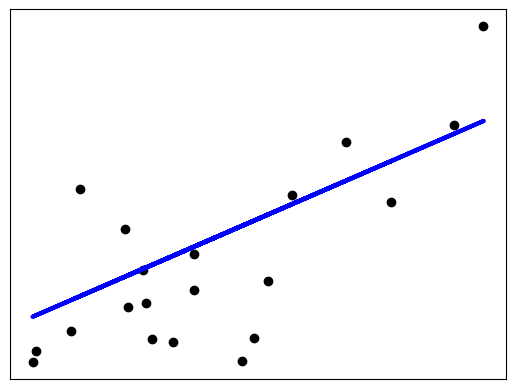

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()